In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df = pd.read_csv(r"magic04.data", names=cols)

In [3]:
df.head()#We can see we don't have labels in these, so we are gonna add labels to them

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()#g-> Gamma, h-> Hydrones
#converting this 0-> g and 1 -> h

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


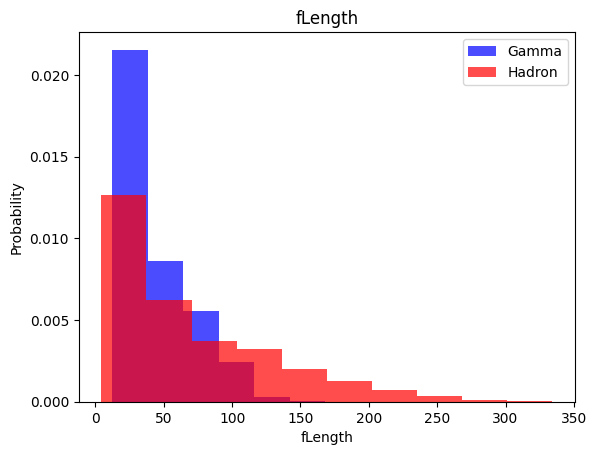

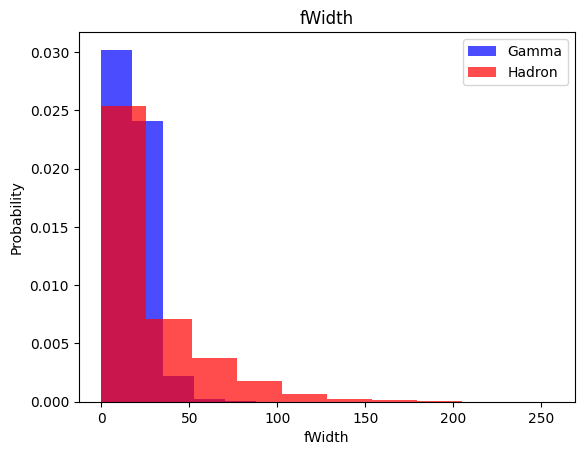

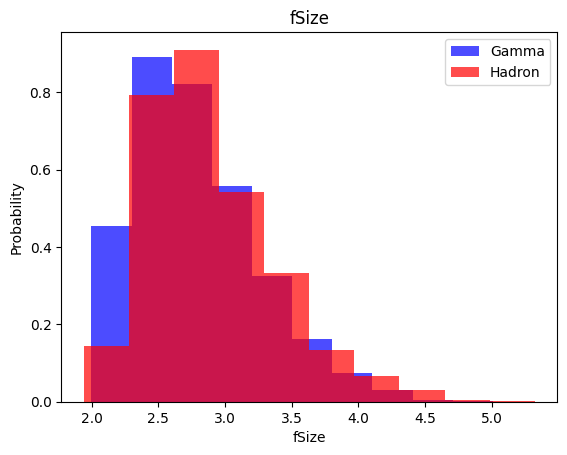

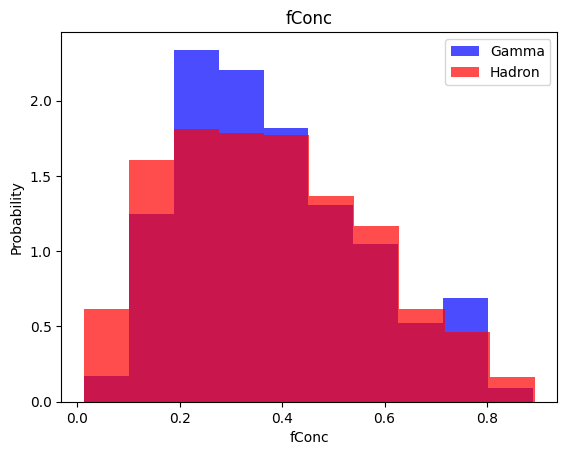

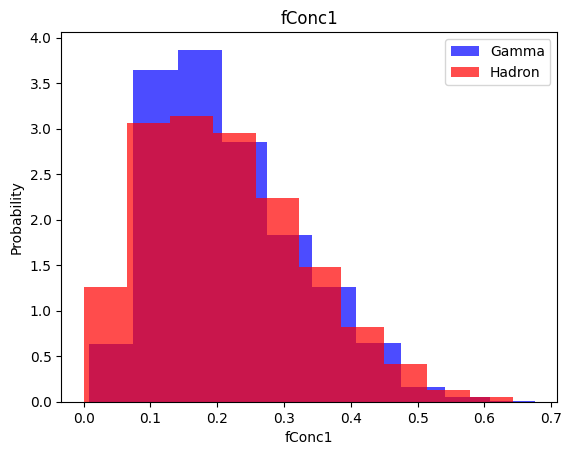

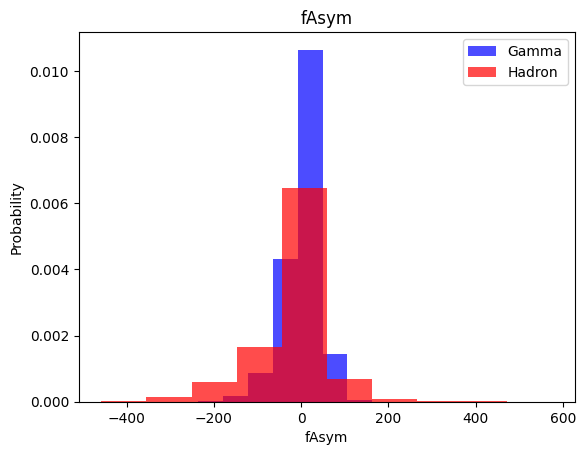

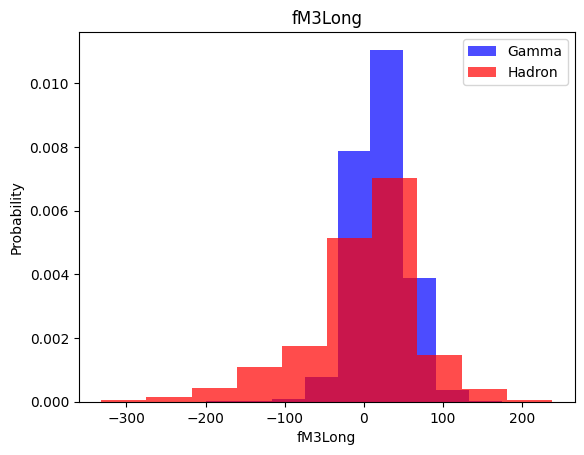

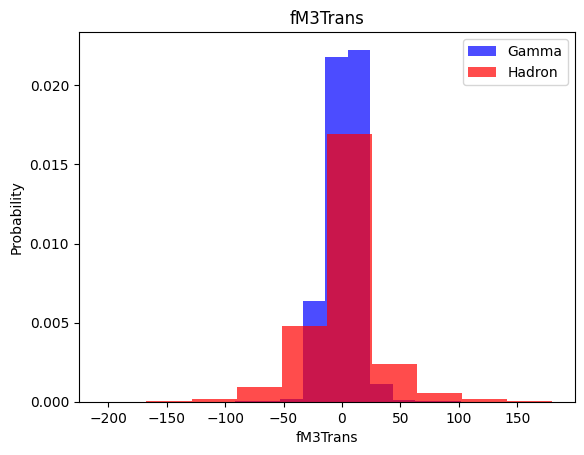

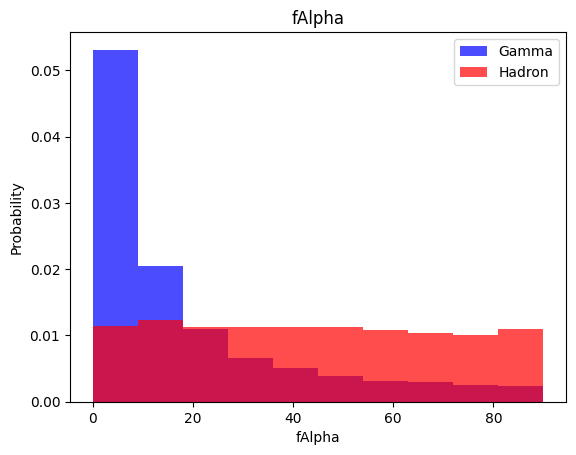

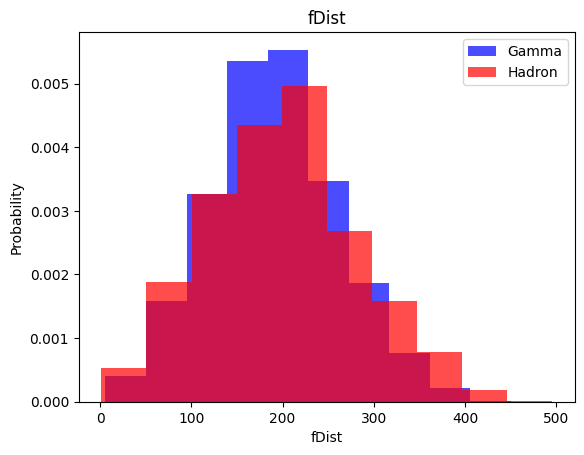

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue", label="Gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0] [label], color="red", label="Hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Creating Train, Testing and Validation Datasets

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y  = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [10]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3266,30.4274,25.0561,2.8503,0.2781,0.1588,-15.0762,-7.8397,-10.9540,32.4970,175.6530,1
16914,134.2040,36.9144,3.6535,0.0919,0.0492,-226.7380,-89.2320,11.0616,21.1960,164.3150,0
8484,34.6655,12.5733,2.5472,0.4113,0.2227,23.5384,11.9924,12.4028,6.9113,205.6130,1
15856,27.4790,9.2526,2.6478,0.5342,0.2690,20.3192,9.4213,3.5276,45.8344,102.2934,0
11210,44.3994,19.0966,3.1239,0.2910,0.1568,38.1653,33.7283,10.7433,5.8180,218.7920,1
...,...,...,...,...,...,...,...,...,...,...,...
13649,30.4474,18.3170,2.8618,0.3409,0.1753,-7.0644,15.8153,-5.8422,58.7136,216.1380,0
11198,22.0627,16.0658,2.5664,0.4532,0.2917,-4.2840,-12.3548,-10.7005,12.0409,153.5050,1
6409,77.6784,25.6998,3.6576,0.2206,0.1149,32.4617,61.8591,-20.2988,1.5920,270.0400,1
14334,91.8196,28.9136,3.1287,0.1613,0.0822,-73.0896,56.8652,-24.9286,85.3089,31.7783,0


In [11]:
print(len(train[train["class"] == 1])) #Gamma Ones
print(len(train[train["class"] == 0])) #Hydron Ones

7380
4032


In [12]:
train, X_train, y_train  =  scale_dataset(train, oversample=True)
valid, X_valid, y_valid  =  scale_dataset(valid, oversample=False)
test, X_test, y_test  =  scale_dataset(test, oversample=False)

In [13]:
len(y_train)

14760

In [14]:
sum(y_train == 1)

7380

In [15]:
sum(y_train == 0)

7380

# Using k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # for classification report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5) #Try n_neighbors value 1,3 and 5 and check the result
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1340
           1       0.85      0.86      0.85      2464

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Using Naive bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [22]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.39      0.48      1340
           1       0.73      0.88      0.80      2464

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.70      0.71      0.69      3804



# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [25]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1340
           1       0.84      0.81      0.82      2464

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.78      3804



# Support Vector Machine

In [26]:
#SVM Implementation
from sklearn.svm import SVC

In [27]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [28]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1340
           1       0.89      0.89      0.89      2464

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.86      3804



# Neural Network

In [29]:
import tensorflow as tf

In [46]:
def plot_loss(history):
    """Plot training and validation loss across epochs."""
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    """Plot training and validation accuracy across epochs."""
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [45]:
# Create a sequential neural network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0) using verbose won't print the epoch number and loss

Epoch 1/100


369/369 [==============================] - 1s 1ms/step - loss: 0.4494 - accuracy: 0.7959 - val_loss: 0.6800 - val_accuracy: 0.6179
Epoch 2/100
369/369 [==============================] - 0s 953us/step - loss: 0.3693 - accuracy: 0.8448 - val_loss: 0.5288 - val_accuracy: 0.7229
Epoch 3/100
369/369 [==============================] - 0s 922us/step - loss: 0.3527 - accuracy: 0.8522 - val_loss: 0.5072 - val_accuracy: 0.7415
Epoch 4/100
369/369 [==============================] - 0s 977us/step - loss: 0.3446 - accuracy: 0.8558 - val_loss: 0.4746 - val_accuracy: 0.7473
Epoch 5/100
369/369 [==============================] - 0s 887us/step - loss: 0.3388 - accuracy: 0.8584 - val_loss: 0.5447 - val_accuracy: 0.7090
Epoch 6/100
369/369 [==============================] - 0s 900us/step - loss: 0.3339 - accuracy: 0.8606 - val_loss: 0.5069 - val_accuracy: 0.7276
Epoch 7/100
369/369 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8620 - val_loss: 0.5095 - val_accu

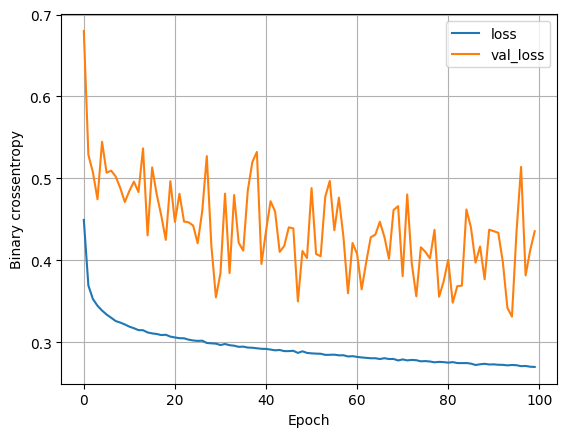

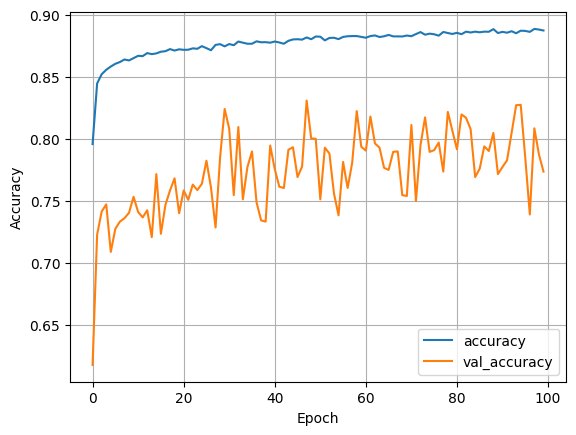

In [49]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
# def plot_history(history):
#   fig, (ax1, ax2) = plt.subplots(1,2)
#   ax1.plot(history.history["loss"], label="loss")
#   ax1.plot(history.history["val_loss"], label="val_loss")
#   ax1.set_xlabel("Epoch")
#   ax1.set_ylabel("Binary crossentropy")
# #   ax1.plt.legend()
#   ax1.grid(True)

#   ax2.plot(history.history["accuracy"], label="accuracy")
#   ax2.plot(history.history["val_accuracy"], label="val_accuracy")
#   ax2.set_xlabel("Epoch")
#   ax2.set_ylabel("Accuracy")
#   ax2.grid(True)
#   plt.show()


# def plot_history(history):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # corrected function name + size
#     ax1.plot(history.history["loss"], label="loss")
#     ax1.plot(history.history["val_loss"], label="val_loss")
#     ax1.set_xlabel("Epoch")
#     ax1.set_ylabel("Binary Crossentropy")
#     ax1.legend()  # fixed
#     ax1.grid(True)  # fixed

#     ax2.plot(history.history["accuracy"], label="accuracy")
#     ax2.plot(history.history["val_accuracy"], label="val_accuracy")
#     ax2.set_xlabel("Epoch")
#     ax2.set_ylabel("Accuracy")
#     ax2.legend()  # added
#     ax2.grid(True)

#     plt.tight_layout()
#     plt.show()

In [ ]:
# plot_history(history)

NameError: name 'history' is not defined

In [31]:
# def train_model(X_train, y_train, num_nodes, droupout_prob, lr, batch_size, epochs):    
#     nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
#     tf.kears.layers.Droupout(droupout_prob),
#     tf.keras.layers.Dense(num_nodes, activation="relu"),
#     tf.kears.layers.Droupout(droupout_prob),
#     tf.keras.layers.Dense(1, activation="sigmoid")
#     ])

#     nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy", metrics=["accuracy"])
#     history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0)

#     return nn_model, history

In [ ]:
# epochs = 100
# for num_nodes in [16,32,64]:
#     for dropuout_prob in [0, 0.02]:
#         for lr in [0.01, 0.005, 0.001]:
#             for batch_size in [32,64,128]:
#                 model,history = train_model(X_train, y_train, num_nodes, dropuout_prob, lr, batch_size, epochs)
#                 plot_accuracy(history)
#                 plot_history(history)
